In [14]:
from tensorflow import keras
import tensorflow as tf
import numpy as np  
import math 
import datetime
from keras import applications  
import keras
from sklearn import metrics
from tensorflow.keras import optimizers
from keras.optimizers import rmsprop_v2
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.models import Sequential 
from keras.layers import Dropout, Flatten, Dense 
from keras.utils.np_utils import to_categorical 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time
from keras.callbacks import EarlyStopping


In [15]:
from keras.applications import mobilenet

In [16]:
model=mobilenet.MobileNet(include_top=True,weights='imagenet')

In [17]:
model.layers

In [18]:
from keras.preprocessing import image
import tensorflow as tf
from tensorflow import Graph

In [19]:
img_height, img_width=224, 224

In [36]:
with open('lung.json','r') as f:
    labelInfo=f.read()

In [21]:
import os
train_path=os.path.join("C:/Users/SANIA/OneDrive/Desktop/ML/Lung Disease Dataset/train")
val_path=os.path.join("C:/Users/SANIA/OneDrive/Desktop/ML/Lung Disease Dataset/val")
test_path=os.path.join("C:/Users/SANIA/OneDrive/Desktop/ML/Lung Disease Dataset/test")

batch_size = 16

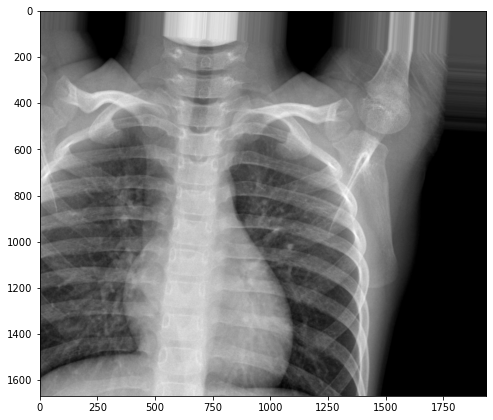

In [22]:
plt.figure(figsize= (8, 8))
img = mpimg.imread("C:/Users/SANIA/OneDrive/Desktop/ML/Lung Disease Dataset/train/Normal/test_0_9774.jpeg")
plt.imshow(img)
plt.show()

In [23]:
start = datetime.datetime.now()
traingen = ImageDataGenerator(rescale= 1./255,
                             shear_range=0.2,
                             width_shift_range=0.2 , 
                             height_shift_range=0.2 ,
                             zoom_range=0.2,
                             horizontal_flip=True)
valgen = ImageDataGenerator(rescale= 1./255)
testgen = ImageDataGenerator(rescale= 1./255)

In [24]:
train_it=traingen.flow_from_directory(
      train_path,
      target_size=(224,224),
      class_mode='categorical',
      batch_size=batch_size
      )

val_it=traingen.flow_from_directory(
      val_path,
      target_size=(224,224),
      class_mode='categorical',
      batch_size=batch_size
    )

test_it=traingen.flow_from_directory(
      test_path,
      target_size=(224,224),
      shuffle=False,
      class_mode='categorical',
      batch_size=batch_size
      )

nb_train_samples = len(train_it.filenames) 
num_classes = len(train_it.class_indices) 


 
train_labels = train_it.classes 
test_labels= test_it.classes
train_labels = to_categorical(train_labels, num_classes=num_classes)

val_labels=val_it.classes
val_labels = to_categorical(val_labels, num_classes=num_classes)

Found 6054 images belonging to 5 classes.
Found 2016 images belonging to 5 classes.
Found 2025 images belonging to 5 classes.


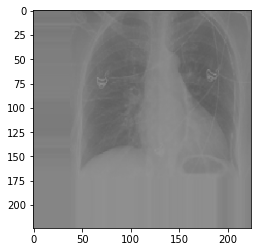

In [25]:
plt.figure()
plt.imshow(next(train_it)[0][0])
plt.show()

In [26]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_it.classes), y=train_it.classes)

class_weights = dict(zip( np.unique(train_it.classes), class_weights))
class_weights
print(class_weights)

{0: 1.0048132780082988, 1: 0.994088669950739, 2: 1.0031483015741507, 3: 0.9924590163934426, 4: 1.0056478405315614}


In [27]:
base_model_201 = tf.keras.applications.DenseNet201(input_shape = (224, 224, 3),
    include_top=False,
    weights="imagenet"
)

for layer in base_model_201.layers:
  layer.trainable = False

x = layers.Flatten()(base_model_201.output)
x = layers.Dropout(0.5)(x) 
x = layers.Dense(512, activation= 'relu')(x)
x = layers.Dense(5, activation = 'softmax')(x)

model2 = tf.keras.models.Model(base_model_201.input, x)

In [28]:
model2.compile('adam', loss = 'categorical_crossentropy',metrics = ['acc'])

In [29]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [30]:
Checkpoint = tf.keras.callbacks.ModelCheckpoint("densenet201.hdf5", monitor="val_acc", save_best_only= True, mode="max")
reduce_lr = ReduceLROnPlateau(monitor= "val_acc", factor= 0.5, patience= 4, verbose= 3,cooldown=2,  mode= "max", min=2, min_lr= 0.0000001)

In [31]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_2[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

 n)                                                                                               
                                                                                                  
 conv2_block4_1_conv (Conv2D)   (None, 56, 56, 128)  20480       ['conv2_block4_0_relu[0][0]']    
                                                                                                  
 conv2_block4_1_bn (BatchNormal  (None, 56, 56, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 56, 56, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_blo

 conv3_block2_0_relu (Activatio  (None, 28, 28, 160)  0          ['conv3_block2_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_1_conv (Conv2D)   (None, 28, 28, 128)  20480       ['conv3_block2_0_relu[0][0]']    
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv3_block6_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block6_2_conv (Conv2D)   (None, 28, 28, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 28, 28, 320)  0          ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_block7_0_bn (BatchNormal  (None, 28, 28, 320)  1280       ['conv3_block6_concat[0][0]']    
 ization) 

 ate)                                                             'conv3_block10_2_conv[0][0]']   
                                                                                                  
 conv3_block11_0_bn (BatchNorma  (None, 28, 28, 448)  1792       ['conv3_block10_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_block11_0_relu (Activati  (None, 28, 28, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 28, 28, 128)  57344       ['conv3_block11_0_relu[0][0]']   
                                                                                                  
 conv3_blo

 conv4_block2_concat (Concatena  (None, 14, 14, 320)  0          ['conv4_block1_concat[0][0]',    
 te)                                                              'conv4_block2_2_conv[0][0]']    
                                                                                                  
 conv4_block3_0_bn (BatchNormal  (None, 14, 14, 320)  1280       ['conv4_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 14, 14, 320)  0          ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 14, 14, 128)  40960       ['conv4_block3_0_relu[0][0]']    
          

 n)                                                                                               
                                                                                                  
 conv4_block7_1_conv (Conv2D)   (None, 14, 14, 128)  57344       ['conv4_block7_0_relu[0][0]']    
                                                                                                  
 conv4_block7_1_bn (BatchNormal  (None, 14, 14, 128)  512        ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 14, 14, 128)  0          ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

 conv4_block11_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block11_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block11_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_concat (Concaten  (None, 14, 14, 608)  0          ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 14, 14, 608)  2432       ['conv4_block11_concat[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block16_0_bn (BatchNorma  (None, 14, 14, 736)  2944       ['conv4_block15_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_0_relu (Activati  (None, 14, 14, 736)  0          ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 14, 14, 128)  94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block16_1_conv[0][0]']   
 lization)

 conv4_block20_1_conv (Conv2D)  (None, 14, 14, 128)  110592      ['conv4_block20_0_relu[0][0]']   
                                                                                                  
 conv4_block20_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block20_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block20_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block20_1_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block24_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block24_1_relu[0][0]']   
                                                                                                  
 conv4_block24_concat (Concaten  (None, 14, 14, 1024  0          ['conv4_block23_concat[0][0]',   
 ate)                           )                                 'conv4_block24_2_conv[0][0]']   
                                                                                                  
 conv4_block25_0_bn (BatchNorma  (None, 14, 14, 1024  4096       ['conv4_block24_concat[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 conv4_block25_0_relu (Activati  (None, 14, 14, 1024  0          ['conv4_block25_0_bn[0][0]']     
 on)      

 lization)                      )                                                                 
                                                                                                  
 conv4_block29_0_relu (Activati  (None, 14, 14, 1152  0          ['conv4_block29_0_bn[0][0]']     
 on)                            )                                                                 
                                                                                                  
 conv4_block29_1_conv (Conv2D)  (None, 14, 14, 128)  147456      ['conv4_block29_0_relu[0][0]']   
                                                                                                  
 conv4_block29_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block29_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_blo

 conv4_block33_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block33_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block33_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block33_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block33_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block33_1_relu[0][0]']   
                                                                                                  
 conv4_block33_concat (Concaten  (None, 14, 14, 1312  0          ['conv4_block32_concat[0][0]',   
 ate)                           )                                 'conv4_block33_2_conv[0][0]']   
          

                                                                                                  
 conv4_block37_concat (Concaten  (None, 14, 14, 1440  0          ['conv4_block36_concat[0][0]',   
 ate)                           )                                 'conv4_block37_2_conv[0][0]']   
                                                                                                  
 conv4_block38_0_bn (BatchNorma  (None, 14, 14, 1440  5760       ['conv4_block37_concat[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 conv4_block38_0_relu (Activati  (None, 14, 14, 1440  0          ['conv4_block38_0_bn[0][0]']     
 on)                            )                                                                 
                                                                                                  
 conv4_blo

 conv4_block42_0_relu (Activati  (None, 14, 14, 1568  0          ['conv4_block42_0_bn[0][0]']     
 on)                            )                                                                 
                                                                                                  
 conv4_block42_1_conv (Conv2D)  (None, 14, 14, 128)  200704      ['conv4_block42_0_relu[0][0]']   
                                                                                                  
 conv4_block42_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block42_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block42_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block42_1_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block46_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block46_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block46_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block46_1_relu[0][0]']   
                                                                                                  
 conv4_block46_concat (Concaten  (None, 14, 14, 1728  0          ['conv4_block45_concat[0][0]',   
 ate)                           )                                 'conv4_block46_2_conv[0][0]']   
                                                                                                  
 conv4_block47_0_bn (BatchNorma  (None, 14, 14, 1728  6912       ['conv4_block46_concat[0][0]']   
 lization)

                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 128)   512         ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 128)   0           ['conv5_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_2_conv (Conv2D)   (None, 7, 7, 32)     36864       ['conv5_block2_1_relu[0][0]']    
                                                                                                  
 conv5_block2_concat (Concatena  (None, 7, 7, 960)   0           ['conv5_block1_concat[0][0]',    
 te)      

 conv5_block6_2_conv (Conv2D)   (None, 7, 7, 32)     36864       ['conv5_block6_1_relu[0][0]']    
                                                                                                  
 conv5_block6_concat (Concatena  (None, 7, 7, 1088)  0           ['conv5_block5_concat[0][0]',    
 te)                                                              'conv5_block6_2_conv[0][0]']    
                                                                                                  
 conv5_block7_0_bn (BatchNormal  (None, 7, 7, 1088)  4352        ['conv5_block6_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block7_0_relu (Activatio  (None, 7, 7, 1088)  0           ['conv5_block7_0_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv5_block11_0_relu (Activati  (None, 7, 7, 1216)  0           ['conv5_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block11_1_conv (Conv2D)  (None, 7, 7, 128)    155648      ['conv5_block11_0_relu[0][0]']   
                                                                                                  
 conv5_block11_1_bn (BatchNorma  (None, 7, 7, 128)   512         ['conv5_block11_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block11_1_relu (Activati  (None, 7, 7, 128)   0           ['conv5_block11_1_bn[0][0]']     
 on)      

 lization)                                                                                        
                                                                                                  
 conv5_block15_1_relu (Activati  (None, 7, 7, 128)   0           ['conv5_block15_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block15_2_conv (Conv2D)  (None, 7, 7, 32)     36864       ['conv5_block15_1_relu[0][0]']   
                                                                                                  
 conv5_block15_concat (Concaten  (None, 7, 7, 1376)  0           ['conv5_block14_concat[0][0]',   
 ate)                                                             'conv5_block15_2_conv[0][0]']   
                                                                                                  
 conv5_blo

 conv5_block19_concat (Concaten  (None, 7, 7, 1504)  0           ['conv5_block18_concat[0][0]',   
 ate)                                                             'conv5_block19_2_conv[0][0]']   
                                                                                                  
 conv5_block20_0_bn (BatchNorma  (None, 7, 7, 1504)  6016        ['conv5_block19_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block20_0_relu (Activati  (None, 7, 7, 1504)  0           ['conv5_block20_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block20_1_conv (Conv2D)  (None, 7, 7, 128)    192512      ['conv5_block20_0_relu[0][0]']   
          

 on)                                                                                              
                                                                                                  
 conv5_block24_1_conv (Conv2D)  (None, 7, 7, 128)    208896      ['conv5_block24_0_relu[0][0]']   
                                                                                                  
 conv5_block24_1_bn (BatchNorma  (None, 7, 7, 128)   512         ['conv5_block24_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block24_1_relu (Activati  (None, 7, 7, 128)   0           ['conv5_block24_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_blo

 conv5_block28_1_relu (Activati  (None, 7, 7, 128)   0           ['conv5_block28_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block28_2_conv (Conv2D)  (None, 7, 7, 32)     36864       ['conv5_block28_1_relu[0][0]']   
                                                                                                  
 conv5_block28_concat (Concaten  (None, 7, 7, 1792)  0           ['conv5_block27_concat[0][0]',   
 ate)                                                             'conv5_block28_2_conv[0][0]']   
                                                                                                  
 conv5_block29_0_bn (BatchNorma  (None, 7, 7, 1792)  7168        ['conv5_block28_concat[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 bn (BatchNormalization)        (None, 7, 7, 1920)   7680        ['conv5_block32_concat[0][0]']   
                                                                                                  
 relu (Activation)              (None, 7, 7, 1920)   0           ['bn[0][0]']                     
                                                                                                  
 flatten (Flatten)              (None, 94080)        0           ['relu[0][0]']                   
                                                                                                  
 dropout (Dropout)              (None, 94080)        0           ['flatten[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 512)          48169472    ['dropout[0][0]']                
          

In [32]:
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=3)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

callbacks_list = [ early, learning_rate_reduction]

In [33]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_it.classes),y=train_it.classes)
class_weights = dict(zip( np.unique(train_it.classes), class_weights))
class_weights 
print(class_weights)

{0: 1.0048132780082988, 1: 0.994088669950739, 2: 1.0031483015741507, 3: 0.9924590163934426, 4: 1.0056478405315614}


In [35]:
history=model2.fit(train_it, validation_data= val_it,class_weight=class_weights, epochs=100 , callbacks= [reduce_lr, early , Checkpoint])

Epoch 1/100
379/379 [==============================] - 1837s 5s/step - loss: 1.8683 - acc: 0.7192 - val_loss: 0.4984 - val_acc: 0.7996 - lr: 0.0010
Epoch 2/100
379/379 [==============================] - 1825s 5s/step - loss: 0.4700 - acc: 0.8024 - val_loss: 0.4596 - val_acc: 0.8194 - lr: 0.0010
Epoch 3/100
379/379 [==============================] - 1786s 5s/step - loss: 0.4217 - acc: 0.8223 - val_loss: 0.4186 - val_acc: 0.8219 - lr: 0.0010
Epoch 4/100
379/379 [==============================] - 1625s 4s/step - loss: 0.4092 - acc: 0.8327 - val_loss: 0.4075 - val_acc: 0.8333 - lr: 0.0010
Epoch 5/100
379/379 [==============================] - 2023s 5s/step - loss: 0.4115 - acc: 0.8277 - val_loss: 0.4033 - val_acc: 0.8175 - lr: 0.0010
Epoch 6/100
379/379 [==============================] - 1609s 4s/step - loss: 0.4011 - acc: 0.8343 - val_loss: 0.3992 - val_acc: 0.8284 - lr: 0.0010
Epoch 7/100
379/379 [==============================] - 1716s 5s/step - loss: 0.3647 - acc: 0.8464 - val_loss: 0.

In [56]:
model.save('lungdisease.h5')

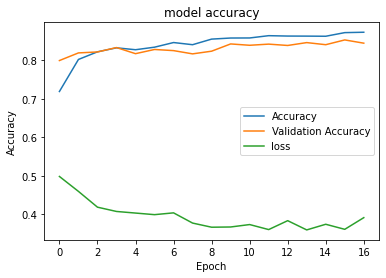

In [37]:
plt.plot(history.history["acc"])
plt.plot(history.history['val_acc'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [38]:
preds = model2.predict(test_it,verbose=1).argmax(axis=1)

127/127 [==============================] - 602s 5s/step


In [ ]:
import numpy as np
np.argmax(preds[0])

In [39]:
predictions = preds.copy()
threshold=0.5
predictions=np.where(predictions<threshold,0,1)

In [40]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [41]:
len(test_labels)

2025

In [42]:
test_labels_tentative = pd.DataFrame(test_labels).idxmax(axis=1)
preds_tentative = pd.DataFrame(preds).idxmax(axis=1)

In [43]:
len(test_labels_tentative), len(test_labels)

(2025, 2025)

In [44]:
confusion_matrix= confusion_matrix(test_labels_tentative, preds_tentative)

In [45]:
confusion_matrix


array([[2025]], dtype=int64)

In [46]:

import itertools

<AxesSubplot:>

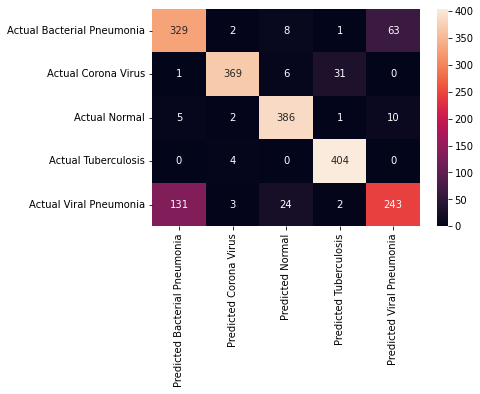

In [47]:
from sklearn.metrics import classification_report,confusion_matrix

cm = pd.DataFrame(data=confusion_matrix(test_it.classes, preds, labels = [0,1,2,3,4]),
                  index=["Actual Bacterial Pneumonia","Actual Corona Virus","Actual Normal","Actual Tuberculosis", "Actual Viral Pneumonia"],
                  columns=["Predicted Bacterial Pneumonia","Predicted Corona Virus","Predicted Normal","Predicted Tuberculosis", "Predicted Viral Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [48]:
classification_metrics = metrics.classification_report(test_labels, preds,
                                                      target_names =['BACTERIAL PNEUMONIA','CORONA','NORMAL','TUBERCULOSIS','VIRAL PNEUMONIA'])
print(classification_metrics)

                     precision    recall  f1-score   support

BACTERIAL PNEUMONIA       0.71      0.82      0.76       403
             CORONA       0.97      0.91      0.94       407
             NORMAL       0.91      0.96      0.93       404
       TUBERCULOSIS       0.92      0.99      0.95       408
    VIRAL PNEUMONIA       0.77      0.60      0.68       403

           accuracy                           0.85      2025
          macro avg       0.86      0.85      0.85      2025
       weighted avg       0.86      0.85      0.85      2025



In [49]:
def load_and_prep_image(filename, img_shape=224):
 
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  
  return img

In [50]:
import pathlib

In [51]:
data_dir = pathlib.Path("C:/Users/SANIA/OneDrive/Desktop/ML/Lung Disease Dataset/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) 
print(class_names)

['Bacterial Pneumonia' 'Corona Virus Disease' 'Normal' 'Tuberculosis'
 'Viral Pneumonia']


In [52]:
def pred_and_plot(model, filename, class_names):
  
  
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  
  if len(pred[0]) > 1: 
    pred_class = class_names[pred.argmax()] 
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])]

  
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 19s 19s/step


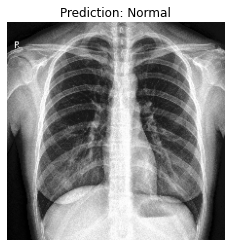

In [53]:
pred_and_plot(model=model2, 
              filename="C:/Users/SANIA/OneDrive/Desktop/ML/Lung Disease Dataset/val/Normal/02.jpeg",
              class_names =class_names)

1/1 [==============================] - 0s 366ms/step


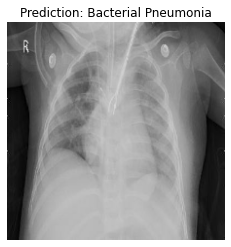

In [54]:
pred_and_plot(model=model2, 
              filename="C:/Users/SANIA/OneDrive/Desktop/ML/Lung Disease Dataset/val/Bacterial Pneumonia/2.jpeg",
              class_names =class_names)

In [64]:
model.save('lungdisease.h5')

In [61]:
from keras.preprocessing import image
import tensorflow as tf
from tensorflow import Graph
import json

In [59]:
img_height, img_width=224, 224

In [57]:
with open('lung.json','r') as f:
    labelInfo=f.read()

In [62]:
labelInfo=json.loads(labelInfo)

In [63]:
labelInfo

{'0': ['n0101', 'Bacterial Pneumonia'],
 '1': ['n0102', 'Corona Virus Disease'],
 '2': ['n0103', 'Normal'],
 '3': ['n0104', 'Tuberculosis'],
 '4': ['n0105', 'Viral Pneumonia']}

In [66]:
model.compiled_metrics == None

True